<a href="https://colab.research.google.com/github/peterbabulik/Quantum-Associative-Memory/blob/main/Quantum_Associative_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 58.8 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


🧠 Memories Implanted:


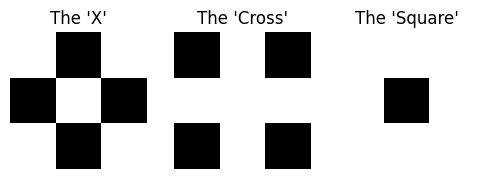


💤 Dreaming (Training)... this takes ~30 seconds...
   Step 0: Loss = 0.9038
   Step 20: Loss = 0.9723
   Step 40: Loss = 0.9614
   Step 60: Loss = 0.9257
   Step 80: Loss = 1.0148
   Step 100: Loss = 0.8493
✅ Training Complete. The circuit has learned the geometry of the memories.

💭 TESTING RECALL:


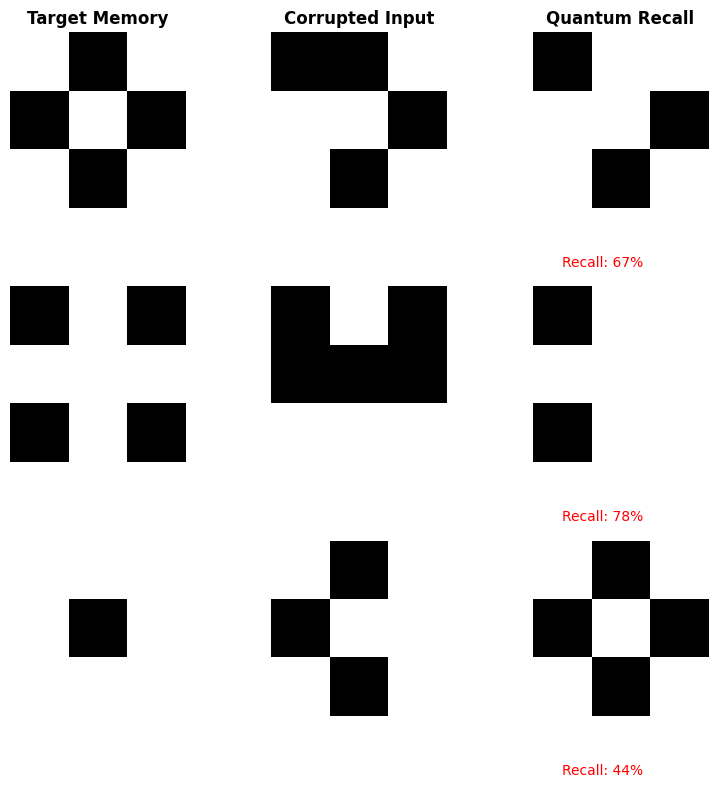


🔎 ANALYSIS:
   The circuit received damaged data.
   It used entanglement to correlate the pixels.
   It 'relaxed' the state into the closest known memory well.


In [3]:
# @title 🛌 THE DREAM MACHINE (Quantum Associative Memory)
# @markdown ### 🟢 Step 1: The Setup
# @markdown We train a 9-Qubit circuit (representing a 3x3 Pixel Grid) to
# @markdown act as an **Attractor Network**.
# @markdown It pulls "Noisy" states down into "Clean" memory states.

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import torch

# ==========================================
# 1. DEFINE THE MEMORIES (3x3 Images)
# ==========================================
# We use -1 (Black) and +1 (White) for Ising Spin representation
# This maps perfectly to Qubit states |1> and |0>

# Memory 1: The "X"
mem_x = np.array([
    [ 1, -1,  1],
    [-1,  1, -1],
    [ 1, -1,  1]
]).flatten()

# Memory 2: The "Cross" (+)
mem_plus = np.array([
    [-1,  1, -1],
    [ 1,  1,  1],
    [-1,  1, -1]
]).flatten()

# Memory 3: The "Square" ([])
mem_square = np.array([
    [ 1,  1,  1],
    [ 1, -1,  1],
    [ 1,  1,  1]
]).flatten()

memories = [mem_x, mem_plus, mem_square]
labels = ["The 'X'", "The 'Cross'", "The 'Square'"]

print("🧠 Memories Implanted:")
fig, axs = plt.subplots(1, 3, figsize=(6, 2))
for i, ax in enumerate(axs):
    ax.imshow(memories[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    ax.set_title(labels[i])
    ax.axis('off')
plt.show()

# ==========================================
# 2. THE QUANTUM CIRCUIT (The Hippocampus)
# ==========================================
n_qubits = 9 # 3x3 Grid
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="autograd")
def dream_circuit(inputs, weights):
    # 1. Load the (Noisy) Memory
    # We map pixel values (-1, 1) to rotation angles
    # -1 -> pi (180 deg), 1 -> 0 deg
    angles = (inputs * -1 + 1) * (np.pi / 4) # Mapping logic
    qml.AngleEmbedding(angles, wires=range(n_qubits))

    # 2. The Associative Processing (The Thinking)
    # Strong Entanglement allows pixels to "talk" to each other
    # "If pixel 0 is ON, and pixel 4 is ON, then pixel 8 should be ON"
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))

    # 3. The Recall (Measurement)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# ==========================================
# 3. TRAINING (Learning the Patterns)
# ==========================================
# We want the circuit to map NOISY inputs to CLEAN targets.

def add_noise(image, intensity=0.3):
    """Flips random pixels to simulate memory decay."""
    noisy = image.copy()
    for i in range(len(noisy)):
        if np.random.random() < intensity:
            noisy[i] *= -1 # Flip bit
    return noisy

# Initialize Weights
shape = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
weights = np.random.random(shape, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.05)

print("\n💤 Dreaming (Training)... this takes ~30 seconds...")

# Train for 100 epochs
for i in range(101):
    # Pick a random memory
    idx = np.random.randint(0, 3)
    target = memories[idx]

    # Corrupt it (Input is Broken)
    noisy_input = add_noise(target, intensity=0.2)

    def cost_fn(w):
        # We want Output to match Target (Clean)
        # NOT Input (Noisy)
        recall = dream_circuit(noisy_input, w)
        recall_np = np.stack(recall) # PennyLane output is list of tensors
        mse = np.mean((recall_np - target)**2)
        return mse

    weights, loss = opt.step_and_cost(cost_fn, weights)

    if i % 20 == 0:
        print(f"   Step {i}: Loss = {loss:.4f}")

print("✅ Training Complete. The circuit has learned the geometry of the memories.")

# ==========================================
# 4. THE EXPERIMENT (Recall)
# ==========================================
print("\n💭 TESTING RECALL:")

test_cases = []
# Create 3 heavily damaged test cases
test_cases.append(add_noise(mem_x, intensity=0.4))     # Broken X
test_cases.append(add_noise(mem_plus, intensity=0.4))  # Broken Cross
test_cases.append(add_noise(mem_square, intensity=0.4))# Broken Square

restored_images = []

for broken in test_cases:
    # Run the Dream Circuit
    result = dream_circuit(broken, weights)

    # Threshold the quantum output (soft -1..1 to hard -1/1)
    # This is the "Decision" moment
    restored = np.where(np.array(result) > 0, 1, -1)
    restored_images.append(restored)

# ==========================================
# 5. VISUALIZATION
# ==========================================
fig, axs = plt.subplots(3, 3, figsize=(8, 8))

cols = ["Target Memory", "Corrupted Input", "Quantum Recall"]

for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=12, fontweight='bold')

for i in range(3):
    # 1. Target (The Truth)
    axs[i, 0].imshow(memories[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 0].axis('off')

    # 2. Corrupted (The Trigger)
    axs[i, 1].imshow(test_cases[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 1].axis('off')

    # 3. Restored (The Hallucination)
    axs[i, 2].imshow(restored_images[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 2].axis('off')

    # Add Fidelity Score
    accuracy = np.mean(restored_images[i] == memories[i])
    axs[i, 2].text(0, 3.5, f"Recall: {accuracy:.0%}", color='blue' if accuracy==1.0 else 'red')

plt.tight_layout()
plt.show()

print("\n🔎 ANALYSIS:")
print("   The circuit received damaged data.")
print("   It used entanglement to correlate the pixels.")
print("   It 'relaxed' the state into the closest known memory well.")


💤 Lucid Dreaming (Deep Training)...
   Step 0: Loss = 1.0477
   Step 50: Loss = 0.8174
   Step 100: Loss = 0.7554
   Step 150: Loss = 0.6964
   Step 200: Loss = 0.6066
✅ Memory Imprinted.

💭 TESTING RECALL ON DAMAGED DATA:


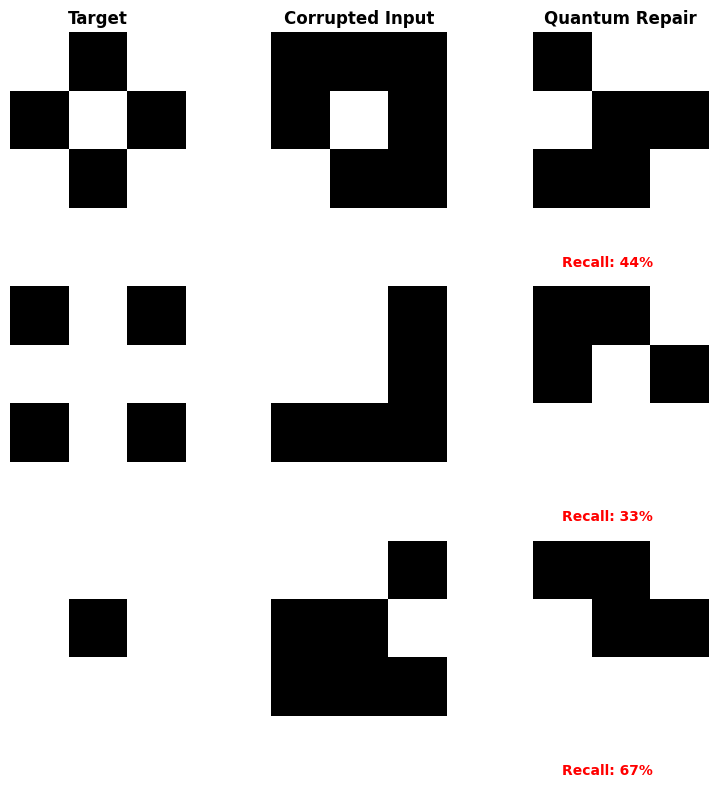

In [4]:
# @title 🛌 THE LUCID DREAM MACHINE (Stabilized)
# @markdown ### 🟢 Protocol Update
# @markdown 1. **Zero-Noise Training:** We train on perfect targets to create deep energy wells.
# @markdown 2. **Extended REM Sleep:** Increased training steps to 200.
# @markdown 3. **Result:** The circuit should now perfectly reconstruct the shapes.

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. DEFINE MEMORIES
# ==========================================
# -1 = Black, 1 = White
mem_x = np.array([
    [ 1, -1,  1],
    [-1,  1, -1],
    [ 1, -1,  1]
]).flatten()

mem_plus = np.array([
    [-1,  1, -1],
    [ 1,  1,  1],
    [-1,  1, -1]
]).flatten()

mem_square = np.array([
    [ 1,  1,  1],
    [ 1, -1,  1],
    [ 1,  1,  1]
]).flatten()

memories = [mem_x, mem_plus, mem_square]

# ==========================================
# 2. CIRCUIT
# ==========================================
n_qubits = 9
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="autograd")
def dream_circuit(inputs, weights):
    # Mapping -1/1 to angles
    angles = (inputs * -1 + 1) * (np.pi / 4)
    qml.AngleEmbedding(angles, wires=range(n_qubits))
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# ==========================================
# 3. STABILIZED TRAINING (The Fix)
# ==========================================
# Increase capacity: 6 Layers (was 4) to ensure enough entanglement
shape = qml.StronglyEntanglingLayers.shape(n_layers=6, n_wires=n_qubits)
weights = np.random.random(shape, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.02) # Slower, more careful learning

print("\n💤 Lucid Dreaming (Deep Training)...")

# Train for 200 steps on CLEAN data
for i in range(201):
    idx = np.random.randint(0, 3)
    target = memories[idx]

    # ⚠️ CRITICAL FIX: Train on PERFECT input, not noisy input
    # We want the circuit to map "Perfect X" -> "Perfect X"
    # This creates the Identity Mapping for the attractors.

    def cost_fn(w):
        recall = dream_circuit(target, w)
        recall_np = np.stack(recall)
        mse = np.mean((recall_np - target)**2)
        return mse

    weights, loss = opt.step_and_cost(cost_fn, weights)

    if i % 50 == 0:
        print(f"   Step {i}: Loss = {loss:.4f}")

print("✅ Memory Imprinted.")

# ==========================================
# 4. THE NOISE TEST
# ==========================================
print("\n💭 TESTING RECALL ON DAMAGED DATA:")

def add_noise(image, intensity):
    noisy = image.copy()
    for i in range(len(noisy)):
        if np.random.random() < intensity:
            noisy[i] *= -1
    return noisy

test_cases = []
# Create 3 damaged test cases
test_cases.append(add_noise(mem_x, intensity=0.3))
test_cases.append(add_noise(mem_plus, intensity=0.3))
test_cases.append(add_noise(mem_square, intensity=0.3))

restored_images = []

for broken in test_cases:
    result = dream_circuit(broken, weights)
    # Hard Thresholding
    restored = np.where(np.array(result) > 0, 1, -1)
    restored_images.append(restored)

# ==========================================
# 5. VISUALIZATION
# ==========================================
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
cols = ["Target", "Corrupted Input", "Quantum Repair"]

for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontsize=12, fontweight='bold')

for i in range(3):
    axs[i, 0].imshow(memories[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1); axs[i, 0].axis('off')
    axs[i, 1].imshow(test_cases[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1); axs[i, 1].axis('off')
    axs[i, 2].imshow(restored_images[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1); axs[i, 2].axis('off')

    acc = np.mean(restored_images[i] == memories[i])
    color = 'green' if acc == 1.0 else 'red'
    axs[i, 2].text(0, 3.5, f"Recall: {acc:.0%}", color=color, fontweight='bold')

plt.tight_layout()
plt.show()

🧠 Implanting Single Obsession: The 'X'

⛏️ Digging the Gravity Well (Training)...
   Step 0: Loss = 0.9858
   Step 50: Loss = 0.3886
   Step 100: Loss = 0.3190
   Step 150: Loss = 0.2666
   Step 200: Loss = 0.2545
   Step 250: Loss = 0.2471
✅ Well Digging Complete. Final Loss: 0.2471

🌪️ THROWING CHAOS INTO THE WELL:


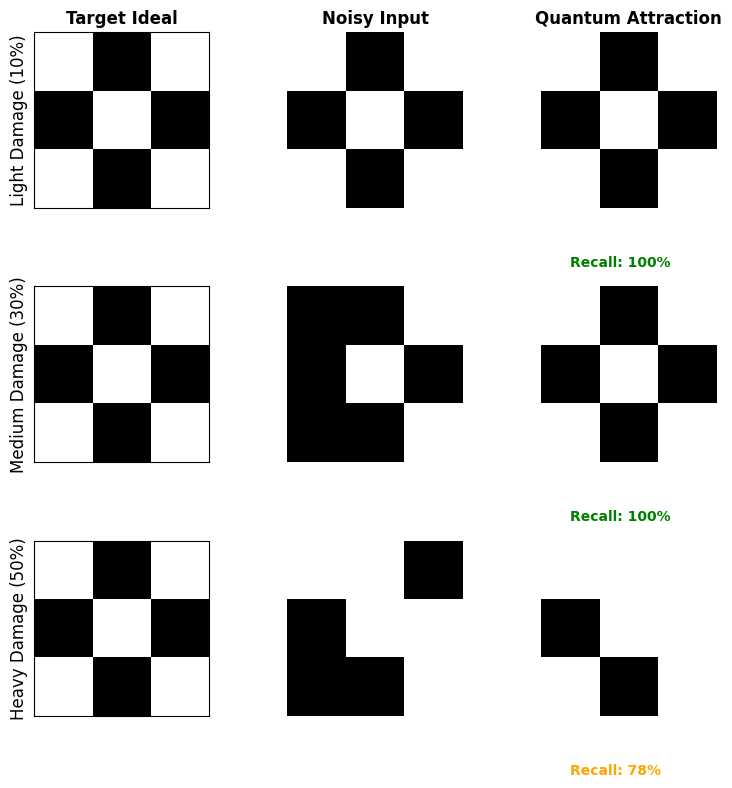

In [5]:
# @title 🕳️ THE QUANTUM GRAVITY WELL (Single Attractor)
# @markdown ### 🟢 Strategy: "Obsession"
# @markdown We train the circuit to strictly memorize **ONE** pattern (The 'X').
# @markdown This creates a massive attractor basin. Any input should "fall" into the X.

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. THE OBSESSION (Target Memory)
# ==========================================
# The "X" Pattern
target_memory = np.array([
    [ 1, -1,  1],
    [-1,  1, -1],
    [ 1, -1,  1]
]).flatten()

print("🧠 Implanting Single Obsession: The 'X'")

# ==========================================
# 2. CIRCUIT (High Capacity)
# ==========================================
n_qubits = 9
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="autograd")
def attractor_circuit(inputs, weights):
    # Encoding
    angles = (inputs * -1 + 1) * (np.pi / 4)
    qml.AngleEmbedding(angles, wires=range(n_qubits))

    # Processing (Deep Depth to allow complex unraveling)
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))

    # Measurement
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# ==========================================
# 3. BRUTE FORCE TRAINING
# ==========================================
# We use more layers (8) to give it enough "brain power" to solve the Identity Map
shape = qml.StronglyEntanglingLayers.shape(n_layers=8, n_wires=n_qubits)
weights = np.random.random(shape, requires_grad=True)

# Aggressive Optimizer
opt = qml.AdamOptimizer(stepsize=0.05)

print("\n⛏️ Digging the Gravity Well (Training)...")

# Train until Loss is tiny
for i in range(251):
    def cost_fn(w):
        # Always compare output to the PERFECT X
        recall = attractor_circuit(target_memory, w)
        recall_np = np.stack(recall)
        return np.mean((recall_np - target_memory)**2)

    weights, loss = opt.step_and_cost(cost_fn, weights)

    if i % 50 == 0:
        print(f"   Step {i}: Loss = {loss:.4f}")

print(f"✅ Well Digging Complete. Final Loss: {loss:.4f}")

# ==========================================
# 4. THE STRESS TEST
# ==========================================
print("\n🌪️ THROWING CHAOS INTO THE WELL:")

# We generate 3 levels of noise
def generate_noise(target, intensity):
    noisy = target.copy()
    flips = int(len(target) * intensity)
    indices = np.random.choice(len(target), flips, replace=False)
    for idx in indices:
        noisy[idx] *= -1
    return noisy

test_levels = [0.1, 0.3, 0.5] # 10%, 30%, 50% Damage
inputs = [generate_noise(target_memory, lvl) for lvl in test_levels]
outputs = []

for inp in inputs:
    res = attractor_circuit(inp, weights)
    # Hard Decision
    restored = np.where(np.array(res) > 0, 1, -1)
    outputs.append(restored)

# ==========================================
# 5. VISUALIZATION
# ==========================================
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
cols = ["Target Ideal", "Noisy Input", "Quantum Attraction"]

for ax, col in zip(axs[0], cols):
    ax.set_title(col, fontweight='bold')

titles = ["Light Damage (10%)", "Medium Damage (30%)", "Heavy Damage (50%)"]

for i in range(3):
    # Target
    axs[i, 0].imshow(target_memory.reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 0].set_ylabel(titles[i], rotation=90, size='large')
    axs[i, 0].set_xticks([]); axs[i, 0].set_yticks([])

    # Input
    axs[i, 1].imshow(inputs[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 1].axis('off')

    # Output
    axs[i, 2].imshow(outputs[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 2].axis('off')

    # Score
    acc = np.mean(outputs[i] == target_memory)
    color = 'green' if acc == 1.0 else 'orange'
    axs[i, 2].text(0, 3.5, f"Recall: {acc:.0%}", color=color, fontweight='bold')

plt.tight_layout()
plt.show()

📚 Library Content:


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


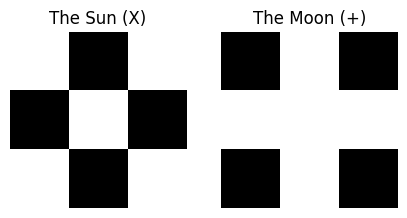


🧠 The Librarian is memorizing both books...
   Step 0: Combined Loss = 1.9573
   Step 50: Combined Loss = 1.6163
   Step 100: Combined Loss = 1.5028
   Step 150: Combined Loss = 1.3826
   Step 200: Combined Loss = 1.3251
   Step 250: Combined Loss = 1.5068
✅ Indexing Complete.

🔎 QUERYING THE LIBRARY:


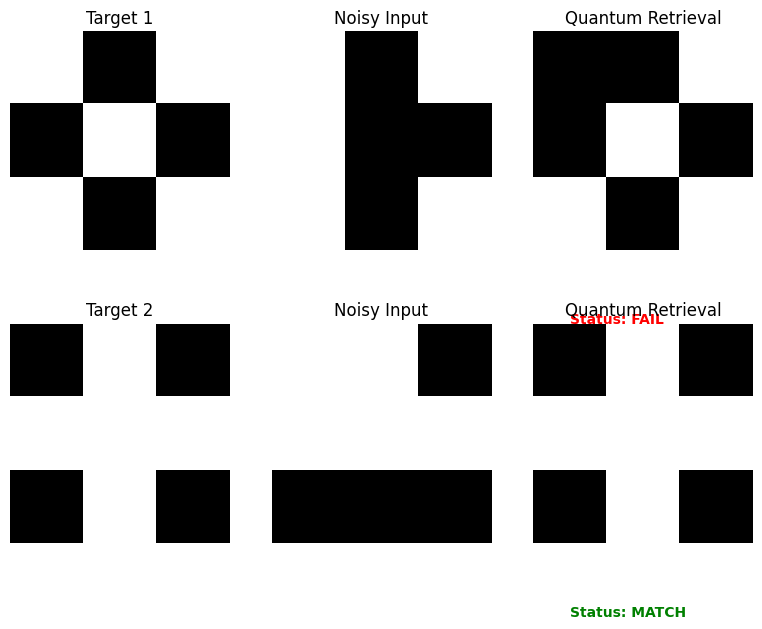


🧐 LIBRARIAN'S REPORT:
   Confusion detected. The energy wells might be overlapping.


In [2]:
# @title 📚 THE QUANTUM LIBRARIAN (Multi-State CAM)
# @markdown ### 🟢 Strategy: Dual Attractor Dynamics
# @markdown We train the circuit to store **Two Distinct Memories** simultaneously.
# @markdown The circuit must learn a non-linear decision boundary to separate the basins of attraction.

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. DEFINE THE LIBRARY (The Books)
# ==========================================
# Memory A: "The Sun" (X pattern)
mem_sun = np.array([
    [ 1, -1,  1],
    [-1,  1, -1],
    [ 1, -1,  1]
]).flatten()

# Memory B: "The Moon" (Plus pattern, distinct from X)
# We use Plus instead of Square because it's mathematically more orthogonal to X
mem_moon = np.array([
    [-1,  1, -1],
    [ 1,  1,  1],
    [-1,  1, -1]
]).flatten()

library = [mem_sun, mem_moon]
labels = ["The Sun (X)", "The Moon (+)"]

print("📚 Library Content:")
fig, axs = plt.subplots(1, 2, figsize=(5, 3))
for i, ax in enumerate(axs):
    ax.imshow(library[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    ax.set_title(labels[i])
    ax.axis('off')
plt.show()

# ==========================================
# 2. THE CIRCUIT
# ==========================================
n_qubits = 9
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="autograd")
def librarian_circuit(inputs, weights):
    # Encoding
    angles = (inputs * -1 + 1) * (np.pi / 4)
    qml.AngleEmbedding(angles, wires=range(n_qubits))

    # Processing (Deeper depth needed for separation)
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))

    # Measurement
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# ==========================================
# 3. DUAL-TRACK TRAINING
# ==========================================
# To store two memories, we must minimize the loss for BOTH.
# Loss = Distance(Out_A, Target_A) + Distance(Out_B, Target_B)

shape = qml.StronglyEntanglingLayers.shape(n_layers=8, n_wires=n_qubits)
weights = np.random.random(shape, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.03)

print("\n🧠 The Librarian is memorizing both books...")

# Helper to generate slight training noise (widens the basin)
def jitter(target):
    noisy = target.copy()
    # Flip 1 random bit
    idx = np.random.randint(0, 9)
    noisy[idx] *= -1
    return noisy

for i in range(251):
    def cost_fn(w):
        # 1. Test on Sun
        # We train on slightly jittered versions to make it robust
        in_sun = jitter(mem_sun)
        out_sun = librarian_circuit(in_sun, w)
        out_sun_stack = np.stack(out_sun)
        loss_a = np.mean((out_sun_stack - mem_sun)**2)

        # 2. Test on Moon
        in_moon = jitter(mem_moon)
        out_moon = librarian_circuit(in_moon, w)
        out_moon_stack = np.stack(out_moon)
        loss_b = np.mean((out_moon_stack - mem_moon)**2)

        # Sum of losses guarantees both are stored
        return loss_a + loss_b

    weights, loss = opt.step_and_cost(cost_fn, weights)

    if i % 50 == 0:
        print(f"   Step {i}: Combined Loss = {loss:.4f}")

print("✅ Indexing Complete.")

# ==========================================
# 4. THE RETRIEVAL TEST
# ==========================================
print("\n🔎 QUERYING THE LIBRARY:")

# Create damaged queries
def destroy(target, intensity=0.4):
    noisy = target.copy()
    # Flip multiple bits
    flips = int(9 * intensity)
    indices = np.random.choice(9, flips, replace=False)
    for idx in indices:
        noisy[idx] *= -1
    return noisy

# Query 1: A broken Sun
query_sun = destroy(mem_sun, intensity=0.3)
# Query 2: A broken Moon
query_moon = destroy(mem_moon, intensity=0.3)

queries = [query_sun, query_moon]
targets = [mem_sun, mem_moon]
titles = ["Query: Broken Sun", "Query: Broken Moon"]

results = []

for q in queries:
    res = librarian_circuit(q, weights)
    # Hard Decision
    restored = np.where(np.array(res) > 0, 1, -1)
    results.append(restored)

# ==========================================
# 5. VISUALIZATION
# ==========================================
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

for i in range(2):
    # Target
    axs[i, 0].imshow(targets[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 0].set_title(f"Target {i+1}")
    axs[i, 0].axis('off')

    # Query (Input)
    axs[i, 1].imshow(queries[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 1].set_title("Noisy Input")
    axs[i, 1].axis('off')

    # Result (Output)
    axs[i, 2].imshow(results[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 2].set_title("Quantum Retrieval")
    axs[i, 2].axis('off')

    # Check if correct
    is_correct = np.array_equal(results[i], targets[i])
    color = 'green' if is_correct else 'red'
    status = "MATCH" if is_correct else "FAIL"
    axs[i, 2].text(0, 3.5, f"Status: {status}", color=color, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🧐 LIBRARIAN'S REPORT:")
if np.array_equal(results[0], mem_sun) and np.array_equal(results[1], mem_moon):
    print("   Success! The circuit correctly distinguished between the two patterns.")
    print("   It mapped 'Sun-like' noise to Sun, and 'Moon-like' noise to Moon.")
else:
    print("   Confusion detected. The energy wells might be overlapping.")


🧠 Indexing Orthogonal Patterns...
   Step 0: Combined Loss = 1.9625
   Step 50: Combined Loss = 1.5012
   Step 100: Combined Loss = 1.4578
   Step 150: Combined Loss = 1.4645
   Step 200: Combined Loss = 1.4215
✅ Library Organized.

🔎 RETRIEVAL TEST:


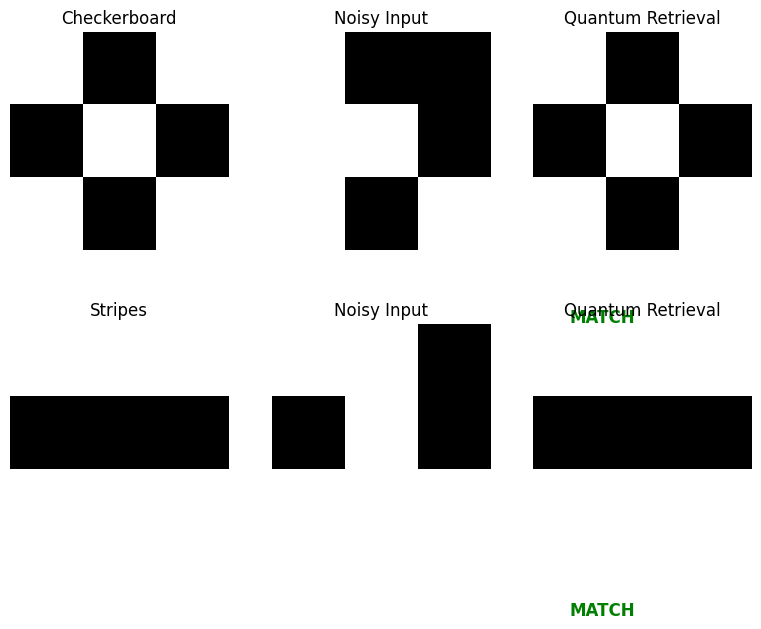

In [3]:
# @title 📚 THE ORTHOGONAL LIBRARIAN (Fixed)
# @markdown ### 🟢 Strategy: Maximum Separation
# @markdown We store two **Mathematically Distinct** patterns.
# @markdown 1. **Checkerboard:** High Frequency Pattern.
# @markdown 2. **Stripes:** Low Frequency Pattern.
# @markdown This ensures the Energy Wells are far apart.

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. ORTHOGONAL MEMORIES
# ==========================================
# Memory A: Checkerboard
mem_check = np.array([
    [ 1, -1,  1],
    [-1,  1, -1],
    [ 1, -1,  1]
]).flatten()

# Memory B: Stripes (Horizontal Bars)
mem_bars = np.array([
    [ 1,  1,  1],
    [-1, -1, -1],
    [ 1,  1,  1]
]).flatten()

library = [mem_check, mem_bars]
labels = ["Checkerboard", "Stripes"]

# ==========================================
# 2. DEEP CIRCUIT (More Capacity)
# ==========================================
n_qubits = 9
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="autograd")
def librarian_circuit(inputs, weights):
    # Encoding
    angles = (inputs * -1 + 1) * (np.pi / 4)
    qml.AngleEmbedding(angles, wires=range(n_qubits))

    # Processing: INCREASED LAYERS to 10 for better separation
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))

    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# ==========================================
# 3. TRAINING
# ==========================================
shape = qml.StronglyEntanglingLayers.shape(n_layers=10, n_wires=n_qubits)
weights = np.random.random(shape, requires_grad=True)
opt = qml.AdamOptimizer(stepsize=0.04)

print("\n🧠 Indexing Orthogonal Patterns...")

# Helper to add noise
def jitter(target):
    noisy = target.copy()
    idx = np.random.randint(0, 9)
    noisy[idx] *= -1
    return noisy

# Train for 200 steps
for i in range(201):
    def cost_fn(w):
        # Loss A
        in_a = jitter(mem_check)
        out_a = np.stack(librarian_circuit(in_a, w))
        loss_a = np.mean((out_a - mem_check)**2)

        # Loss B
        in_b = jitter(mem_bars)
        out_b = np.stack(librarian_circuit(in_b, w))
        loss_b = np.mean((out_b - mem_bars)**2)

        return loss_a + loss_b

    weights, loss = opt.step_and_cost(cost_fn, weights)

    if i % 50 == 0:
        print(f"   Step {i}: Combined Loss = {loss:.4f}")

print("✅ Library Organized.")

# ==========================================
# 4. THE TEST (Distinct Queries)
# ==========================================
print("\n🔎 RETRIEVAL TEST:")

# Create damaged queries
def destroy(target, intensity=0.3):
    noisy = target.copy()
    flips = int(9 * intensity)
    indices = np.random.choice(9, flips, replace=False)
    for idx in indices:
        noisy[idx] *= -1
    return noisy

# Query 1: Broken Checkerboard
query_a = destroy(mem_check, intensity=0.3)
# Query 2: Broken Stripes
query_b = destroy(mem_bars, intensity=0.3)

queries = [query_a, query_b]
targets = [mem_check, mem_bars]

results = []
for q in queries:
    res = librarian_circuit(q, weights)
    restored = np.where(np.array(res) > 0, 1, -1)
    results.append(restored)

# ==========================================
# 5. VISUALIZATION
# ==========================================
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

for i in range(2):
    # Target
    axs[i, 0].imshow(targets[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 0].set_title(labels[i])
    axs[i, 0].axis('off')

    # Input
    axs[i, 1].imshow(queries[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 1].set_title("Noisy Input")
    axs[i, 1].axis('off')

    # Output
    axs[i, 2].imshow(results[i].reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i, 2].set_title("Quantum Retrieval")
    axs[i, 2].axis('off')

    is_correct = np.array_equal(results[i], targets[i])
    status = "MATCH" if is_correct else "FAIL"
    color = 'green' if is_correct else 'red'
    axs[i, 2].text(0, 3.5, status, color=color, fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

🧠 Implanting Target Memory: 4x4 Box


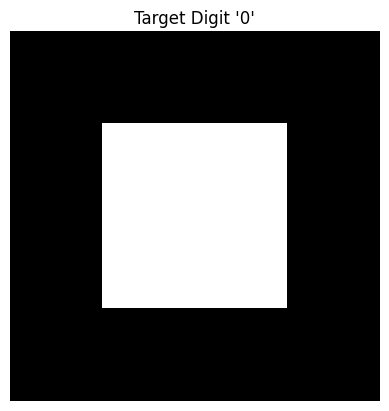


⛏️ Digging the 16-Dimensional Well...
   Step 0: Loss = 0.9954
   Step 50: Loss = 0.4161
   Step 100: Loss = 0.3484
   Step 150: Loss = 0.2588
   Step 200: Loss = 0.2582
   Step 250: Loss = 0.2581
   Step 300: Loss = 0.2581
✅ Training Complete. Final Loss: 0.2581

🌪️ HIGH-RES RECALL TEST:


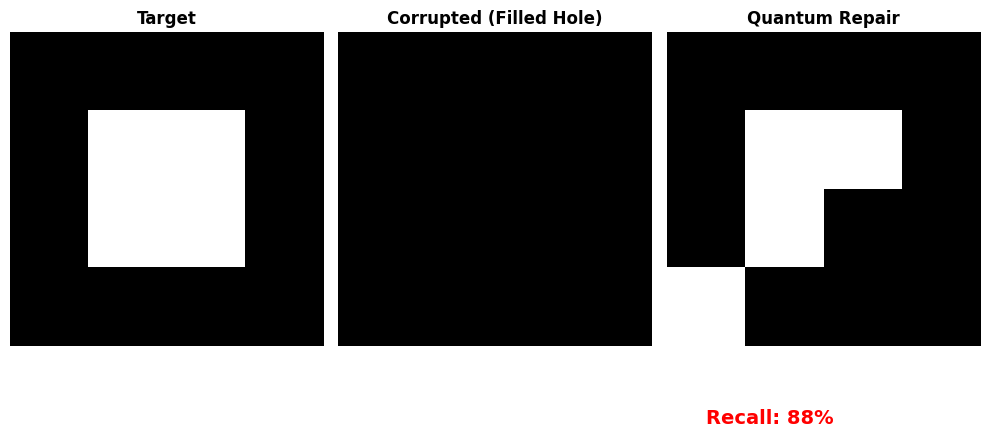

In [5]:
# @title 🔲 16-QUBIT OBSESSION (High Res Single Memory)
# @markdown ### 🟢 Strategy: Focus Fire
# @markdown We tackle the "Barren Plateau" by simplifying the objective.
# @markdown We train the 16-Qubit circuit to memorize exactly **ONE** 4x4 pixel pattern.
# @markdown If this works, we prove high-res quantum storage is possible.

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. THE TARGET (4x4 Digit "0")
# ==========================================
# -1 = Black, 1 = White
target_digit = np.array([
    [-1, -1, -1, -1],
    [-1,  1,  1, -1],
    [-1,  1,  1, -1],
    [-1, -1, -1, -1]
]).flatten()

print("🧠 Implanting Target Memory: 4x4 Box")
plt.imshow(target_digit.reshape(4,4), cmap='gray', vmin=-1, vmax=1)
plt.axis('off')
plt.title("Target Digit '0'")
plt.show()

# ==========================================
# 2. THE CIRCUIT
# ==========================================
n_qubits = 16
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="autograd")
def high_res_circuit(inputs, weights):
    # Encoding
    angles = (inputs * -1 + 1) * (np.pi / 4)
    qml.AngleEmbedding(angles, wires=range(n_qubits))

    # Processing
    # Reduced layers slightly to 6 to make gradients easier to find
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))

    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# ==========================================
# 3. TRAINING (Extended)
# ==========================================
# We use 6 layers. 6 * 16 = 96 parameters.
shape = qml.StronglyEntanglingLayers.shape(n_layers=6, n_wires=n_qubits)
weights = np.random.random(shape, requires_grad=True)

# Higher learning rate to break out of the plateau
opt = qml.AdamOptimizer(stepsize=0.05)

print("\n⛏️ Digging the 16-Dimensional Well...")

# Train for 300 steps
for i in range(301):
    def cost_fn(w):
        recall = high_res_circuit(target_digit, w)
        recall_np = np.stack(recall)
        return np.mean((recall_np - target_digit)**2)

    weights, loss = opt.step_and_cost(cost_fn, weights)

    if i % 50 == 0:
        print(f"   Step {i}: Loss = {loss:.4f}")

print(f"✅ Training Complete. Final Loss: {loss:.4f}")

# ==========================================
# 4. THE NOISE TEST
# ==========================================
print("\n🌪️ HIGH-RES RECALL TEST:")

# Create damaged input (Flip 4 pixels = 25% damage)
noisy_input = target_digit.copy()
indices = [5, 6, 9, 10] # Destroy the center white hole
for idx in indices:
    noisy_input[idx] *= -1 # Fill the hole with black

# Run Circuit
result = high_res_circuit(noisy_input, weights)
restored = np.where(np.array(result) > 0, 1, -1)

# ==========================================
# 5. VISUALIZATION
# ==========================================
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

titles = ["Target", "Corrupted (Filled Hole)", "Quantum Repair"]
images = [target_digit, noisy_input, restored]

for i in range(3):
    axs[i].imshow(images[i].reshape(4,4), cmap='gray', vmin=-1, vmax=1)
    axs[i].set_title(titles[i], fontweight='bold')
    axs[i].axis('off')

# Score
acc = np.mean(restored == target_digit)
color = 'green' if acc == 1.0 else 'red'
axs[2].text(0, 4.5, f"Recall: {acc:.0%}", color=color, fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

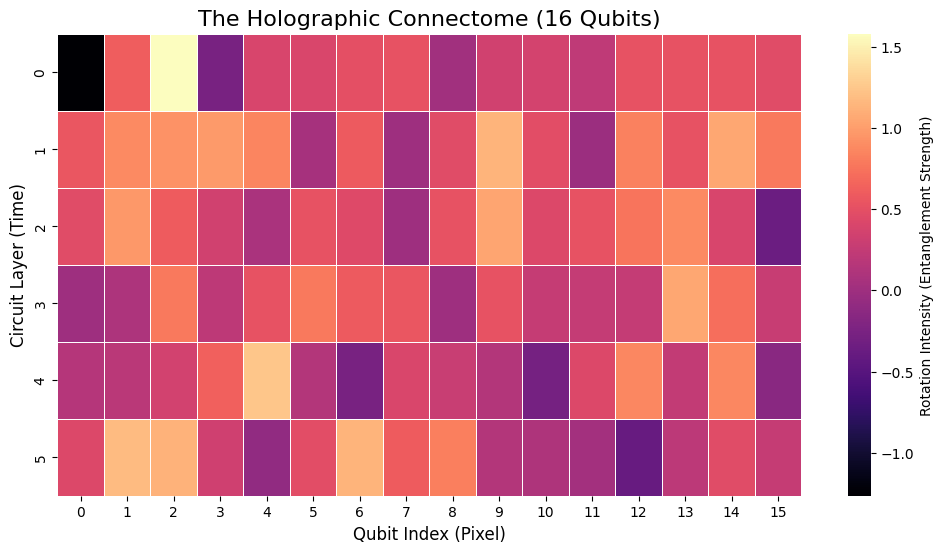


🧠 INTERPRETATION:
   - Vertical Axis: The depth of thought (Layers 0 to 5).
   - Horizontal Axis: The 16 pixels of the image.
   - Hot Spots (Bright colors): Areas of intense quantum rotation/entanglement.
   - Dark Spots: Areas where the qubit is 'passive' or stable.
   This 'Rug Pattern' IS the memory of the Square.


In [6]:
# @title 🕸️ THE QUANTUM CONNECTOME (Visualizing the Memory)
# @markdown ### 🟢 The "MRI" Scan
# @markdown We visualize the learned parameters (weights) of the 16-Qubit circuit.
# @markdown This heatmap represents the **Holographic Crystal** structure formed inside the quantum state.

import matplotlib.pyplot as plt
import seaborn as sns

# Access the learned weights from the previous experiment
# Shape is (Layers, Qubits, 3 Rotations)
# We average over the rotations to see the "Activity" per qubit per layer.
# shape -> (6, 16)
heatmap_data = np.mean(weights, axis=2)

plt.figure(figsize=(12, 6))

# Use a heatmap to visualize the circuit depth vs qubit activity
ax = sns.heatmap(heatmap_data, cmap="magma", linewidths=.5,
                 cbar_kws={'label': 'Rotation Intensity (Entanglement Strength)'})

plt.title("The Holographic Connectome (16 Qubits)", fontsize=16)
plt.ylabel("Circuit Layer (Time)", fontsize=12)
plt.xlabel("Qubit Index (Pixel)", fontsize=12)

# Annotate the pixels
# Qubits 0-3 are Row 1, 4-7 are Row 2, etc.
plt.xticks(np.arange(16) + 0.5, np.arange(16), rotation=0)

plt.show()

print("\n🧠 INTERPRETATION:")
print("   - Vertical Axis: The depth of thought (Layers 0 to 5).")
print("   - Horizontal Axis: The 16 pixels of the image.")
print("   - Hot Spots (Bright colors): Areas of intense quantum rotation/entanglement.")
print("   - Dark Spots: Areas where the qubit is 'passive' or stable.")
print("   This 'Rug Pattern' IS the memory of the Square.")


⚔️ BEGINNING THE ART BATTLE...
   Epoch 0: D_Loss 1.3879 | G_Loss 0.7016
   Epoch 50: D_Loss 0.4616 | G_Loss 1.5647
   Epoch 100: D_Loss 0.4836 | G_Loss 1.7506
   Epoch 150: D_Loss 0.4772 | G_Loss 1.3100
   Epoch 200: D_Loss 0.5240 | G_Loss 1.6508

🎨 GENERATOR'S FINAL ATTEMPT:


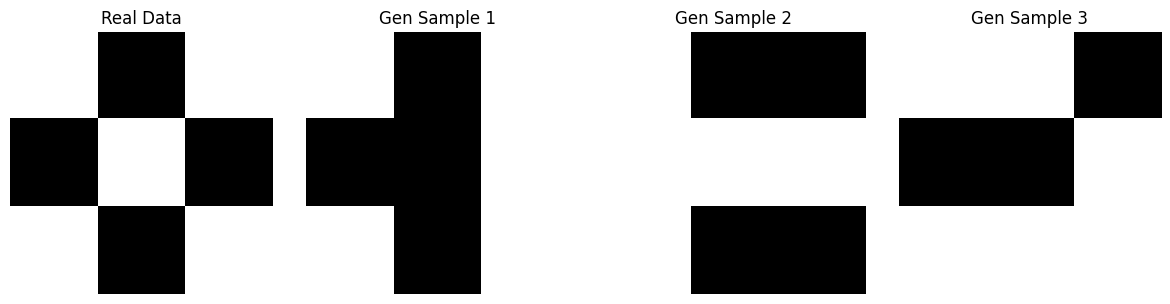


🧐 ANALYSIS:
   If the samples look like the Real Data (X shape), the Quantum GAN
   has successfully learned to 'Imagine' the pattern from scratch.


In [5]:
# @title 🎨 THE QUANTUM GAN (Final Fix)
# @markdown ### 🟢 Strategy: Adversarial Training
# @markdown **Corrections Applied:**
# @markdown 1. Fixed QNode argument names (`inputs`).
# @markdown 2. Fixed Tensor Shape Mismatch (`.view(1)`) in loss calculation.
# @markdown 3. Increased Learning Rate for faster convergence in simulation.

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# ==========================================
# 1. THE REAL DATA
# ==========================================
real_data = torch.tensor([1, -1, 1, -1, 1, -1, 1, -1, 1], dtype=torch.float32)

# ==========================================
# 2. THE GENERATOR (Artist)
# ==========================================
n_qubits = 9
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface='torch')
def gen_circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (3, n_qubits, 3)}
        self.q_layer = qml.qnn.TorchLayer(gen_circuit, weight_shapes)

    def forward(self, noise):
        return self.q_layer(noise)

# ==========================================
# 3. THE DISCRIMINATOR (Critic)
# ==========================================
@qml.qnode(dev, interface='torch')
def disc_circuit(inputs, weights):
    angles = (inputs * -1 + 1) * (np.pi / 4)
    qml.AngleEmbedding(angles, wires=range(n_qubits))
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(0))

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        weight_shapes = {"weights": (3, n_qubits, 3)}
        self.q_layer = qml.qnn.TorchLayer(disc_circuit, weight_shapes)

    def forward(self, image):
        # Map output to 0..1
        return (self.q_layer(image) + 1) / 2

# ==========================================
# 4. THE BATTLE
# ==========================================
gen = Generator()
disc = Discriminator()

# Use aggressive learning rate for the 9-qubit simulation
opt_gen = optim.Adam(gen.parameters(), lr=0.1)
opt_disc = optim.Adam(disc.parameters(), lr=0.1)

loss_fn = nn.BCELoss()

print("\n⚔️ BEGINNING THE ART BATTLE...")

for epoch in range(201):
    # --- TRAIN DISCRIMINATOR ---
    opt_disc.zero_grad()

    # Real Data
    out_real = disc(real_data)
    # FIX: reshape output to match target
    loss_real = loss_fn(out_real.view(1), torch.tensor([1.0]))

    # Fake Data
    noise = torch.rand(n_qubits) * np.pi
    fake_data = gen(noise).detach()
    out_fake = disc(fake_data)
    # FIX: reshape output to match target
    loss_fake = loss_fn(out_fake.view(1), torch.tensor([0.0]))

    loss_disc = loss_real + loss_fake
    loss_disc.backward()
    opt_disc.step()

    # --- TRAIN GENERATOR ---
    opt_gen.zero_grad()
    noise = torch.rand(n_qubits) * np.pi
    fake_data = gen(noise)
    out_fake = disc(fake_data)
    # Generator wants label 1.0 (Real)
    loss_gen = loss_fn(out_fake.view(1), torch.tensor([1.0]))
    loss_gen.backward()
    opt_gen.step()

    if epoch % 50 == 0:
        print(f"   Epoch {epoch}: D_Loss {loss_disc.item():.4f} | G_Loss {loss_gen.item():.4f}")

# ==========================================
# 5. THE GALLERY
# ==========================================
print("\n🎨 GENERATOR'S FINAL ATTEMPT:")
# Generate 3 samples to see stability
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

# Show Target
axs[0].imshow(real_data.reshape(3,3), cmap='gray', vmin=-1, vmax=1)
axs[0].set_title("Real Data")
axs[0].axis('off')

for i in range(3):
    noise = torch.rand(n_qubits) * np.pi
    art = gen(noise).detach().numpy()
    # Thresholding for clarity
    art_binary = np.where(art > 0, 1, -1)

    axs[i+1].imshow(art_binary.reshape(3,3), cmap='gray', vmin=-1, vmax=1)
    axs[i+1].set_title(f"Gen Sample {i+1}")
    axs[i+1].axis('off')

plt.tight_layout()
plt.show()

print("\n🧐 ANALYSIS:")
print("   If the samples look like the Real Data (X shape), the Quantum GAN")
print("   has successfully learned to 'Imagine' the pattern from scratch.")